# Deep Neural Networks (DNN) Practice with Fashion MNIST Dataset

In [1]:
# Import tensorflow, keras and the fashion MNIST modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

2022-11-07 00:03:07.659247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 00:03:07.747157: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-07 00:03:07.750171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 00:03:07.750183: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [2]:
# Load the dataset to memory
(training_data, training_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Label: 9


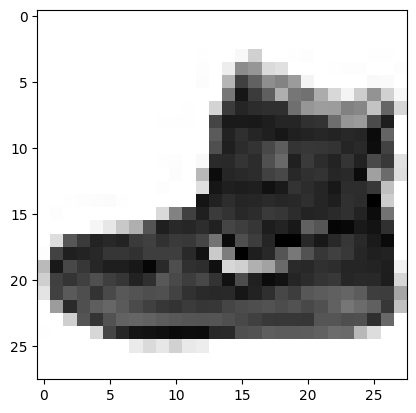

In [3]:
# Display one of the images from the dataset
import matplotlib.pyplot as plt

index = 0

print(f"Label: {training_labels[index]}")

plt.imshow(training_data[index], cmap="Greys")

In [4]:
# normalize the images
training_data = training_data / 255.0
test_data = test_data / 255.0

In [5]:
# Define the AI model
model = keras.models.Sequential(
    layers=[
        keras.layers.Flatten(input_shape=training_data[0].shape),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

2022-11-07 00:05:28.496219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-07 00:05:28.496241: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-07 00:05:28.496261: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2022-11-07 00:05:28.496436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Train the model
model.compile(optimizer=tf.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(training_data, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5033 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3422 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3165 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2981 - accuracy: 0.8908


In [7]:
# Evaluate the model using the test data
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 789us/step - loss: 0.3525 - accuracy: 0.8743


[0.35245203971862793, 0.8743000030517578]

# Exercises

## Exercise 1

For the first exercise, run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classification set. The output, after we run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [8]:
classifications = model.predict(test_data)
print(classifications[0])

313/313 [==============================] - 0s 508us/step
[8.8558963e-06 4.1190239e-07 1.9421605e-06 1.6872526e-06 3.2725750e-06
 8.0310227e-03 1.9290726e-06 5.2518904e-02 2.4026781e-04 9.3919176e-01]


The reason why the output is a list of numbers is because each neuron at the output layer produces an output based on the input we want to classify. Since we have 10 neurons, we will have 10 outputs. Each number in this list represents a label. This means that the result we get is a list of probabilities which represents the probability of a given image to belong in a given class.

## Exercise 2

Let's now look at the layers in the model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc.? Why do you think that's the case?

In [9]:
# creating another model with a different number of neuron in the hidden layer
model_2 = keras.models.Sequential(
    layers=[
        keras.layers.Flatten(input_shape=training_data[0].shape),
        keras.layers.Dense(512, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

model_2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy"
)

model_2.fit(training_data, training_labels, epochs=5)

model_2.evaluate(test_data, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 910us/step - loss: 0.4760
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3560
Epoch 3/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.3200
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2981
Epoch 5/5
313/313 [==============================] - 0s 503us/step - loss: 0.3488


0.34878453612327576

Training time seems to be faster when we increased the number of neurons from 128 to 512. Each epoch took 3 seconds when we had 128 neurons in the hidden layer. On the other hand, each epoch took 2 seconds when we had 512 neurons.

Loss seems to be hovering around the same value, however it is lower when we have 512 neurons in the hidden layer.

The reason why this is the case can be explained as we now have more variables that we use to determine the rules (128 vs 512), which will result in a better estimation.

### E2Q1: What happens if we increase the number of neurons in the hidden layer from 512 to 1024?

In [13]:
model_3 = keras.models.Sequential(
    layers=[
        keras.layers.Flatten(input_shape=training_data[0].shape),
        keras.layers.Dense(1024, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model_3.fit(training_data, training_labels, epochs=5)

model_3.evaluate(test_data, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.4690
Epoch 2/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.3576
Epoch 3/5
1875/1875 [==============================] - 2s 870us/step - loss: 0.3216
Epoch 4/5
1875/1875 [==============================] - 2s 866us/step - loss: 0.2956
Epoch 5/5
313/313 [==============================] - 0s 539us/step - loss: 0.3293


0.32926908135414124

Here, we can see that the training time is around the same when compared to the training times of 128 and 512 neurons. However, the loss at the end of 5 epochs is the lowest out of the 3.

## Exercise 3

### E3Q1: What would happen if you remove the Flatten() layer? Why do you think that's the case?

Removing the flatten layer will result in a runtime error where the shape of hidden layer does not match the shape of the input. The reason why we get this error is that TensorFlow is enforcing the rule of thumb that the first layer in the network should be the same shape as the data.

## Exercise 4

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?

There are 10 of them because we have 10 labels. If we had a different amount than 10, we would face another runtime error, probably an index error when the model tries to predict a label that is greater than the number of neurons we have.

This is another rule of thumb that the number of neurons in the last layer should match the number of classes we are classifying for.

## Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10?

In our current exercise, having additional layers wouldn't have much of an impact since we are dealing with relatively simple data. However, for far more complex data, it is often necessary to have extra layers.

## Exercise 6:

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?

In our example, traning for less epochs would mean that we would have a less accurate model with a higher loss value. However, training for more epochs would mean that we are improving the accuracy of our model.

One thing to note is that training the model after a certain number of epochs might cause the model to "overfit", which can result in worse accuracy numbers when evaluated using the test data. This is why it is important to find a balance.

## Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values from 0-1. What would be the impact of removing that? Why do you think you get different results?

Since we are dealing with larger floating point numbers, we will be increasing the effect of rounding errors which means that our model will be less accurate due to the rounding errors.

## Exercise 8:

Earlier when you trained for extra epochs, you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought "wouldn't it be nice if I could stop the training when I reached a desired value?" -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs... So how would you fix that? Like any other program... you have callbacks! Following is an example on how to implement one.

In [14]:
# Callback to stop training once we hit the desired accuracy
class StopTrainingOnAccuracyCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs = None):
        if not logs:
            logs = {}
        
        if logs.get("accuracy") >= 0.8:
            print("\nReached 80% accuracy, stopping training.")
            self.model.stop_training = True

callbacks = [StopTrainingOnAccuracyCallback()]

model_4 = keras.models.Sequential(
    layers=[
        keras.layers.Flatten(input_shape=training_data[0].shape),
        keras.layers.Dense(512, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

model_4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_4.fit(training_data, training_labels, epochs=10, callbacks=callbacks)

Epoch 1/10
1838/1875 [============================>.] - ETA: 0s - loss: 0.4768 - accuracy: 0.8308
Reached 80% accuracy, stopping training.
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4752 - accuracy: 0.8313
